# *Exploratory Data Analysis (EDA)*

 Este notebook tiene como objetivo explorar datos sobre juegos de la plataforma Steam, utilizando tres datasets:
 
 - `steam_games`: información de juegos disponibles (nombre, precio, año, género, acceso anticipado).
 - `user_items`: datos de juegos de usuarios (ID juego, tiempo de juego, ID usuario).
 - `user_reviews`: reseñas de usuarios (ID juego, recomendación, ID usuario, año, sentimiento).

El análisis exploratorio se realizará con Python (pandas, seaborn, matplotlib) y constará de:

1. Análisis de juegos: explorar características como precio, año, género y acceso anticipado mediante gráficos de distribución, conteo y caja.
2. Análisis del tiempo de juego: explorar tiempo acumulado, por juego y por usuario con gráficos de distribución, dispersión y correlación.
3. Análisis de reseñas: explorar recomendaciones, año y sentimiento utilizando gráficos de conteo, barras y torta.
Esto permitirá comprender mejor los datos, identificar patrones, anomalías y variables relevantes, y generar hipótesis para análisis o modelos futuros.

## **Configuraciones Globales e Importaciones**

In [2]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)


print(f"System version: {sys.version}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")

System version: 3.11.8 (main, Mar 12 2024, 11:52:02) [GCC 12.2.0]
pandas version: 2.2.1
matplotlib version: 3.8.3
seaborn version: 0.13.2
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Extracción de los datos**

Creamos una función que lee cada archivo desde su directorio y lo carga a un DataFrame de pandas.

In [3]:
# Cargamos los archivos parquet
def read_parquet_files(parquet_files):
    dataframes = {}
    for name in parquet_files:
        dataframes[name] = pd.read_parquet(f'../dataset/{name}.parquet', engine='pyarrow')
    return dataframes

parquet_files = ['steam_games','user_items', 'user_reviews']
dataframes = read_parquet_files(parquet_files)

# Convertimos a df.
df_steam_games = dataframes['steam_games']
df_user_items = dataframes['user_items']
df_user_reviews = dataframes['user_reviews']

### Dataset Steam Games

In [4]:
df_steam_games.head()

,publisher,item_name,title,release_date,price,early_access,item_id,developer,is_equal,release_year,genres
0,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,False,761140.0,Kotoshiro,True,2018,"[Strategy, Action, Indie, Casual, Simulation]"
1,"Making Fun, Inc.",Ironbound,Ironbound,2018-01-04,0.00,False,643980.0,Secret Level SRL,True,2018,"[Free to Play, Strategy, Indie, RPG]"
2,Poolians.com,Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,0.00,False,670290.0,Poolians.com,True,2017,"[Free to Play, Simulation, Sports, Casual, Indie]"
3,彼岸领域,弹炸人2222,弹炸人2222,2017-12-07,0.99,False,767400.0,彼岸领域,True,2017,"[Action, Adventure, Casual]"
4,unknown,Log Challenge,unknown,None,2.99,False,773570.0,unknown,False,unknown,"[Action, Indie, Casual, Sports]"


In [5]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32132 entries, 0 to 32132
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     32132 non-null  object 
 1   item_name     32132 non-null  object 
 2   title         32132 non-null  object 
 3   release_date  30066 non-null  object 
 4   price         32132 non-null  float64
 5   early_access  32132 non-null  bool   
 6   item_id       32132 non-null  float64
 7   developer     32132 non-null  object 
 8   is_equal      32132 non-null  bool   
 9   release_year  32132 non-null  object 
 10  genres        31102 non-null  object 
dtypes: bool(2), float64(2), object(7)
memory usage: 2.5+ MB


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_steam_games, x='publisher')
plt.xticks(rotation=90)
plt.show()

In [6]:
publisher = df_steam_games.publisher.nunique()
print(f'Tenemos registros de {publisher} editoras de juegos.')

Tenemos registros de 8240 editoras de juegos.


In [7]:
counts = df_steam_games["publisher"].value_counts()
porcentaje = df_steam_games["publisher"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

df_publisher = pd.DataFrame({"publisher": counts.index, "counts": counts.values, "porcentaje": porcentaje.values})
df_publisher.sort_values("counts", ascending=False)

,publisher,counts,percentage
0,unknown,8051,25.06%
1,Ubisoft,385,1.2%
2,Dovetail Games - Trains,360,1.12%
3,Degica,286,0.89%
4,Paradox Interactive,271,0.84%
...,...,...,...
4452,Anima Locus,1,0.0%
4451,Valhalla Cats,1,0.0%
4450,MachineSpirit,1,0.0%
4449,Real Dynamics,1,0.0%


#### Columna `price`

In [8]:
# describimos el dataset de games solo tomando la columna precio

df_steam_games.price.describe()

count    32132.000000
mean         8.696098
std         16.016766
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [9]:
# contamos los valores y calculamos el porcentaje de cada uno de los precios
counts = df_steam_games["price"].value_counts()
porcentaje = df_steam_games["price"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

df_price = pd.DataFrame({"price": counts.index, "counts": counts.values, "porcentaje": porcentaje.values})
df_price.sort_values("counts", ascending=False)

,price,counts,percentage
0,4.99,5450,16.96%
1,9.99,3902,12.14%
2,2.99,3429,10.67%
3,0.99,2607,8.11%
4,1.99,2541,7.91%
...,...,...,...
96,6.49,1,0.0%
95,2.30,1,0.0%
94,42.99,1,0.0%
93,41.99,1,0.0%


- Notamos que la gran mayoria de los juegos tienen precio de 4.99. Ademas de que tenemos 7112 juegos gratuitos.

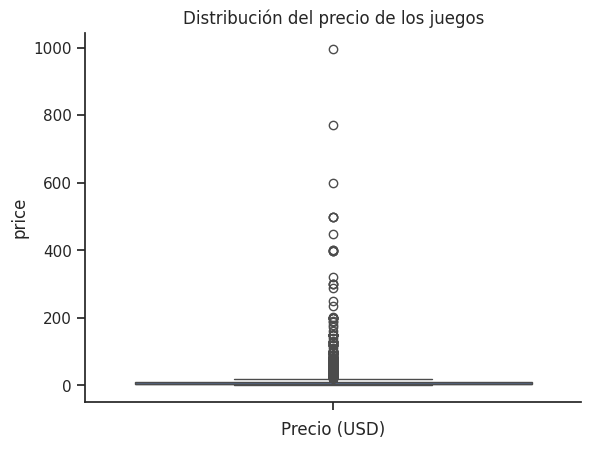

In [10]:
sns.boxplot(data=df_steam_games, y="price")
plt.xlabel("Precio (USD)")
plt.title("Distribución del precio de los juegos")
plt.show()

### Eliminacion de outliers de la columna `price`

In [12]:
# eliminamos los outliers de la columna price usando el rango interquartil

Q1 = df_steam_games["price"].quantile(0.25)
Q3 = df_steam_games["price"].quantile(0.75)
IQR = Q3 - Q1
df_steam_games = df_steam_games[
    ~((df_steam_games["price"] < (Q1 - 1.5 * IQR)) | (df_steam_games["price"] > (Q3 + 1.5 * IQR)))]

df_steam_games.price.describe()



count    30248.000000
mean         6.398972
std          5.274663
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max         20.000000
Name: price, dtype: float64

- Se grafica la distribución de los precios de los juegos, sin outliers.

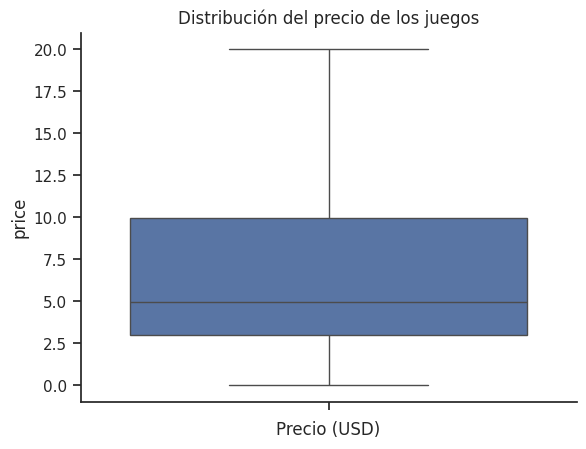

In [13]:
sns.boxplot(data=df_steam_games, y="price")
plt.xlabel("Precio (USD)")
plt.title("Distribución del precio de los juegos")
plt.show()

#### Columna `early_access`

Se grafica la distribución de acceso anticipado de los juegos y se grafica con un grafico de barras.

In [14]:
counts = df_steam_games["early_access"].value_counts()
porcentaje = df_steam_games["early_access"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

df_early_access = pd.DataFrame({"early_access": counts.index, "counts": counts.values, "porcentaje": porcentaje.values})
df_early_access

,early_access,counts,percentage
0,False,28386,93.84%
1,True,1862,6.16%


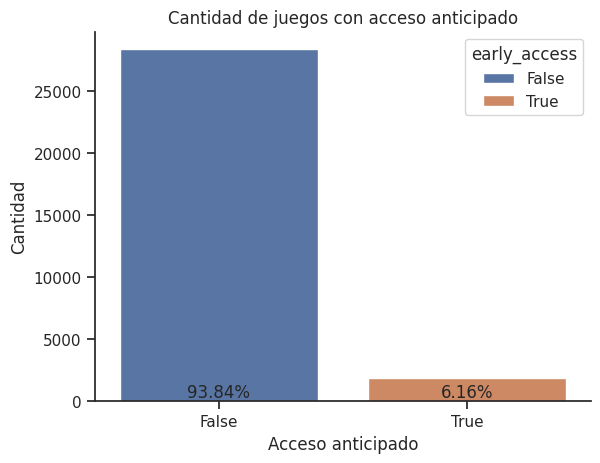

In [15]:
sns.countplot(data=df_steam_games, x="early_access", hue="early_access")
plt.xlabel("Acceso anticipado")
plt.ylabel("Cantidad")
plt.title("Cantidad de juegos con acceso anticipado")

porcentaje = df_steam_games["early_access"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

for i, p in enumerate(porcentaje):
    plt.text(i, 0, p, ha="center", va="bottom")

plt.show()

### Cantidad de juegos segun la columna `item_id`

In [16]:
games = df_steam_games.item_id.nunique()
print(f'Contamos con {games} juegos.')

Contamos con 30248 juegos.


#### Graficas de distribucion frecuencia relativa de Generos de los juegos y Años de lanzamiento

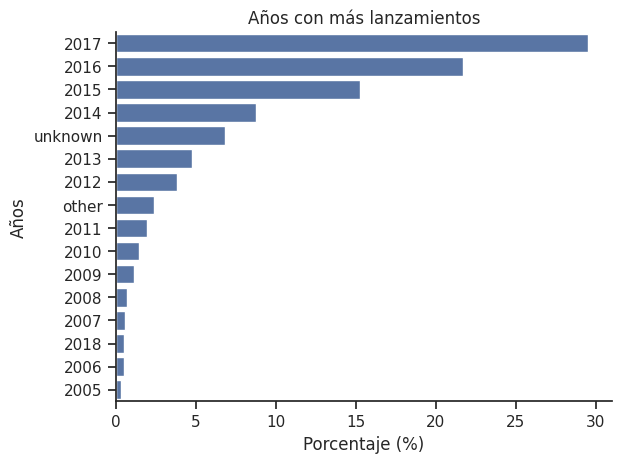

In [17]:
porcentaje = df_steam_games["release_year"].value_counts(normalize=True).mul(100).round(2)
top_15 = porcentaje.nlargest(15).index.tolist()
df_steam_games["grouped_years"] = df_steam_games["release_year"].apply(lambda x: x if x in top_15 else "other")
porcentaje_agrupado = df_steam_games["grouped_years"].value_counts(normalize=True).mul(100).round(2)

sns.barplot(y=porcentaje_agrupado.index, x=porcentaje_agrupado.values)
plt.ylabel("Años")
plt.xlabel("Porcentaje (%)")
plt.title("Años con más lanzamientos")
plt.show()

### Top 10 de desarrolladores y publicadoras

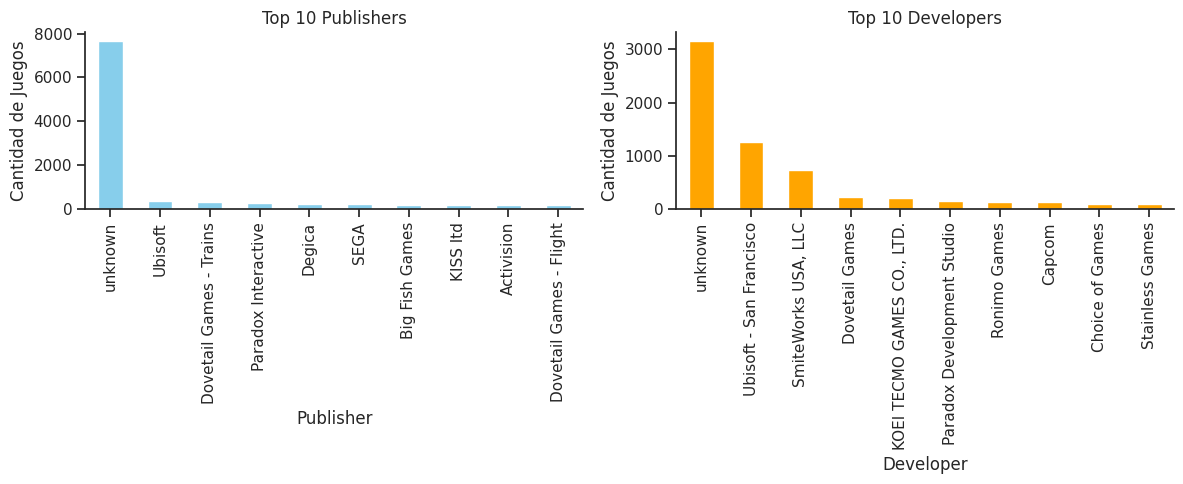

In [18]:
# Contar la cantidad de juegos por publisher
conteo_publisher = df_steam_games['publisher'].value_counts()

# Contar la cantidad de juegos por developer
conteo_developer = df_steam_games['developer'].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
conteo_publisher[:10].plot(kind='bar', color='skyblue')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()